In [1]:
from importlib import reload
import sys
sys.path.append("..")
import os
import persist_to_disk as ptd
ptd.config.set_project_path(os.path.abspath("../"))



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm

%matplotlib inline

In [2]:
import scripts.evaluate as se
res_full = se.Config.tidy_run(se.Config.mimic3_more())

100%|████████████████████| 513/513 [00:01<00:00, 320.90it/s]


# Main AUC

FavMac       1.894792
FPCP         1.823210
ClassWise    1.750038
dtype: float64


Text(0.5, 0, 'Target Cost')

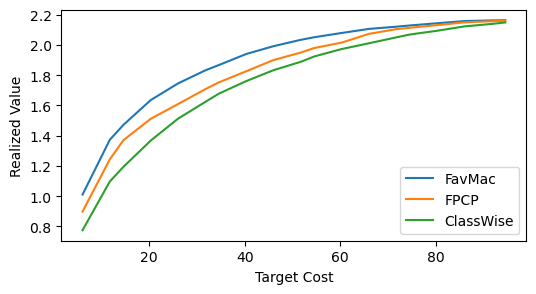

In [3]:
delta = None

METHOD_MAPPING = { 'ClassWise': 'ClassWise', 'GP+DS':'FPCP', "GR": 'FavMac'}

tc2util_m = {}
for method, tres in res_full[delta].items():
    if method not in METHOD_MAPPING: continue
    tc2util_m[METHOD_MAPPING[method]] = se.Evaluator.eval_target2meanutil(tres, 'value') * 100
    tc2util_m[METHOD_MAPPING[method]].index *= 100
ax = pd.DataFrame(tc2util_m).plot(figsize=(6,3))
print(pd.DataFrame(tc2util_m).mean().sort_values(ascending=False))
ax.set_ylabel("Realized Value")
ax.set_xlabel("Target Cost")

In [4]:
# The results are summarized in this flat table.
# For example, the last row means the *max* (describe) of *violation* (metric) is 1.0 (value) for GreedyProba+DeepSet (aka FPCP) 
# given seed, target_cost, and delta
se.Evaluator.flatten_summary(res_full)

,seed,describe,metric,value,target_cost,method,delta
0,0,count,thres,2000.000000,0.06000,GV,NaN
1,0,count,cost,2000.000000,0.06000,GV,NaN
2,0,count,value,2000.000000,0.06000,GV,NaN
3,0,count,|S|,2000.000000,0.06000,GV,NaN
4,0,count,violation,2000.000000,0.06000,GV,NaN
...,...,...,...,...,...,...,...
20059,2,max,thres,0.000000,0.94571,GP+DS,0.1
20060,2,max,cost,1.000000,0.94571,GP+DS,0.1
20061,2,max,value,0.238725,0.94571,GP+DS,0.1
20062,2,max,|S|,35.000000,0.94571,GP+DS,0.1
